# Getting started with gaze dataset 

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the gaze dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any gaze stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs. 

In [1]:
%load_ext autoreload
%autoreload 2  

# Importing the tool

In [2]:
import pandas as pd
from g2c import parsers, visualization, util, aoi

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Parsing raw data from the UNL dataset

In [4]:
# eye_events, samples = parsers.UNL_UM(sample_size = 50)
eye_events, samples = parsers.YMU_UM(sample_size = 100)

Processing files:   1%|          | 1/83 [00:00<01:19,  1.03file/s]

Processed file: YMU-UM Recording10.tsv


Processing files:   2%|▏         | 2/83 [00:02<01:46,  1.31s/file]

Processed file: YMU-UM Recording11.tsv


Processing files:   4%|▎         | 3/83 [00:04<02:25,  1.81s/file]

Processed file: YMU-UM Recording12.tsv


Processing files:   5%|▍         | 4/83 [00:07<02:50,  2.16s/file]

Processed file: YMU-UM Recording13.tsv


Processing files:   6%|▌         | 5/83 [00:10<03:12,  2.47s/file]

Processed file: YMU-UM Recording14.tsv


Processing files:   7%|▋         | 6/83 [00:14<03:37,  2.82s/file]

Processed file: YMU-UM Recording15.tsv


Processing files:   8%|▊         | 7/83 [00:18<04:00,  3.17s/file]

Processed file: YMU-UM Recording16.tsv


Processing files:  10%|▉         | 8/83 [00:22<04:17,  3.44s/file]

Processed file: YMU-UM Recording17.tsv


Processing files:  11%|█         | 9/83 [00:26<04:28,  3.63s/file]

Processed file: YMU-UM Recording18.tsv


Processing files:  12%|█▏        | 10/83 [00:30<04:33,  3.75s/file]

Processed file: YMU-UM Recording19.tsv


Processing files:  13%|█▎        | 11/83 [00:34<04:50,  4.04s/file]

Processed file: YMU-UM Recording2.tsv


Processing files:  14%|█▍        | 12/83 [00:40<05:14,  4.43s/file]

Processed file: YMU-UM Recording20.tsv


Processing files:  16%|█▌        | 13/83 [00:46<05:51,  5.02s/file]

Processed file: YMU-UM Recording21.tsv


Processing files:  17%|█▋        | 14/83 [00:53<06:21,  5.53s/file]

Processed file: YMU-UM Recording22.tsv


Processing files:  18%|█▊        | 15/83 [00:59<06:33,  5.78s/file]

Processed file: YMU-UM Recording23.tsv


Processing files:  19%|█▉        | 16/83 [01:06<06:45,  6.05s/file]

Processed file: YMU-UM Recording24.tsv


Processing files:  20%|██        | 17/83 [01:14<07:25,  6.75s/file]

Processed file: YMU-UM Recording25.tsv


Processing files:  22%|██▏       | 18/83 [01:22<07:40,  7.08s/file]

Processed file: YMU-UM Recording26.tsv


Processing files:  23%|██▎       | 19/83 [01:31<08:00,  7.51s/file]

Processed file: YMU-UM Recording27.tsv


Processing files:  24%|██▍       | 20/83 [01:39<08:05,  7.71s/file]

Processed file: YMU-UM Recording28.tsv


Processing files:  25%|██▌       | 21/83 [01:47<08:15,  7.99s/file]

Processed file: YMU-UM Recording29.tsv


Processing files:  27%|██▋       | 22/83 [01:56<08:17,  8.15s/file]

Processed file: YMU-UM Recording3.tsv


Processing files:  28%|██▊       | 23/83 [02:05<08:28,  8.48s/file]

Processed file: YMU-UM Recording30.tsv


Processing files:  29%|██▉       | 24/83 [02:15<08:43,  8.88s/file]

Processed file: YMU-UM Recording31.tsv


Processing files:  30%|███       | 25/83 [02:25<08:48,  9.12s/file]

Processed file: YMU-UM Recording32.tsv


Processing files:  31%|███▏      | 26/83 [02:35<09:07,  9.61s/file]

Processed file: YMU-UM Recording33.tsv


Processing files:  33%|███▎      | 27/83 [02:46<09:10,  9.84s/file]

Processed file: YMU-UM Recording34.tsv


Processing files:  34%|███▎      | 28/83 [02:56<09:13, 10.06s/file]

Processed file: YMU-UM Recording35.tsv


Processing files:  35%|███▍      | 29/83 [03:07<09:21, 10.39s/file]

Processed file: YMU-UM Recording36.tsv


Processing files:  36%|███▌      | 30/83 [03:19<09:34, 10.84s/file]

Processed file: YMU-UM Recording37.tsv


Processing files:  37%|███▋      | 31/83 [03:32<09:49, 11.34s/file]

Processed file: YMU-UM Recording38.tsv


Processing files:  39%|███▊      | 32/83 [03:45<10:01, 11.79s/file]

Processed file: YMU-UM Recording39.tsv


Processing files:  40%|███▉      | 33/83 [03:58<10:06, 12.13s/file]

Processed file: YMU-UM Recording4.tsv


Processing files:  41%|████      | 34/83 [04:11<10:06, 12.37s/file]

Processed file: YMU-UM Recording40.tsv


Processing files:  42%|████▏     | 35/83 [04:24<10:07, 12.65s/file]

Processed file: YMU-UM Recording41.tsv


Processing files:  43%|████▎     | 36/83 [04:37<10:01, 12.81s/file]

Processed file: YMU-UM Recording42.tsv


Processing files:  45%|████▍     | 37/83 [04:52<10:14, 13.36s/file]

Processed file: YMU-UM Recording43.tsv


Processing files:  46%|████▌     | 38/83 [05:06<10:16, 13.70s/file]

Processed file: YMU-UM Recording44.tsv


Processing files:  47%|████▋     | 39/83 [05:21<10:15, 13.99s/file]

Processed file: YMU-UM Recording45.tsv


Processing files:  48%|████▊     | 40/83 [05:36<10:14, 14.30s/file]

Processed file: YMU-UM Recording46.tsv


Processing files:  49%|████▉     | 41/83 [05:51<10:11, 14.57s/file]

Processed file: YMU-UM Recording47.tsv


Processing files:  51%|█████     | 42/83 [06:06<10:05, 14.76s/file]

Processed file: YMU-UM Recording48.tsv


Processing files:  52%|█████▏    | 43/83 [06:21<09:55, 14.88s/file]

Processed file: YMU-UM Recording49.tsv


Processing files:  53%|█████▎    | 44/83 [06:37<09:48, 15.08s/file]

Processed file: YMU-UM Recording5.tsv


Processing files:  54%|█████▍    | 45/83 [06:54<09:50, 15.54s/file]

Processed file: YMU-UM Recording50.tsv


Processing files:  55%|█████▌    | 46/83 [07:10<09:49, 15.94s/file]

Processed file: YMU-UM Recording51.tsv


Processing files:  57%|█████▋    | 47/83 [07:28<09:49, 16.37s/file]

Processed file: YMU-UM Recording52.tsv


Processing files:  58%|█████▊    | 48/83 [07:45<09:37, 16.50s/file]

Processed file: YMU-UM Recording53.tsv


Processing files:  59%|█████▉    | 49/83 [08:02<09:30, 16.77s/file]

Processed file: YMU-UM Recording54.tsv


Processing files:  60%|██████    | 50/83 [08:19<09:18, 16.93s/file]

Processed file: YMU-UM Recording55.tsv


Processing files:  61%|██████▏   | 51/83 [08:37<09:07, 17.11s/file]

Processed file: YMU-UM Recording56.tsv


Processing files:  63%|██████▎   | 52/83 [08:55<09:02, 17.49s/file]

Processed file: YMU-UM Recording57.tsv


Processing files:  64%|██████▍   | 53/83 [09:14<08:59, 17.97s/file]

Processed file: YMU-UM Recording58.tsv


Processing files:  65%|██████▌   | 54/83 [09:33<08:50, 18.30s/file]

Processed file: YMU-UM Recording59.tsv


Processing files:  66%|██████▋   | 55/83 [09:54<08:51, 18.99s/file]

Processed file: YMU-UM Recording6.tsv


Processing files:  67%|██████▋   | 56/83 [10:15<08:47, 19.53s/file]

Processed file: YMU-UM Recording60.tsv


Processing files:  69%|██████▊   | 57/83 [10:37<08:45, 20.21s/file]

Processed file: YMU-UM Recording61.tsv


Processing files:  70%|██████▉   | 58/83 [10:59<08:38, 20.76s/file]

Processed file: YMU-UM Recording62.tsv


Processing files:  71%|███████   | 59/83 [10:59<05:51, 14.63s/file]

Stimuli not found or error in file: YMU-UM Recording63.tsv | Error: Expected 7 unique stimuli, found 6


Processing files:  72%|███████▏  | 60/83 [11:21<06:30, 16.99s/file]

Processed file: YMU-UM Recording64.tsv


Processing files:  73%|███████▎  | 61/83 [11:44<06:48, 18.55s/file]

Processed file: YMU-UM Recording65.tsv


Processing files:  75%|███████▍  | 62/83 [12:06<06:52, 19.65s/file]

Processed file: YMU-UM Recording66.tsv


Processing files:  76%|███████▌  | 63/83 [12:29<06:51, 20.58s/file]

Processed file: YMU-UM Recording67.tsv


Processing files:  77%|███████▋  | 64/83 [12:52<06:45, 21.32s/file]

Processed file: YMU-UM Recording68.tsv


Processing files:  78%|███████▊  | 65/83 [13:15<06:36, 22.03s/file]

Processed file: YMU-UM Recording69.tsv


Processing files:  80%|███████▉  | 66/83 [13:39<06:22, 22.47s/file]

Processed file: YMU-UM Recording7.tsv


Processing files:  81%|████████  | 67/83 [14:02<06:03, 22.74s/file]

Processed file: YMU-UM Recording70.tsv


Processing files:  82%|████████▏ | 68/83 [14:26<05:46, 23.11s/file]

Processed file: YMU-UM Recording71.tsv


Processing files:  83%|████████▎ | 69/83 [14:51<05:29, 23.57s/file]

Processed file: YMU-UM Recording72.tsv


Processing files:  84%|████████▍ | 70/83 [15:16<05:11, 23.96s/file]

Processed file: YMU-UM Recording73.tsv


Processing files:  86%|████████▌ | 71/83 [15:40<04:48, 24.07s/file]

Processed file: YMU-UM Recording74.tsv


Processing files:  87%|████████▋ | 72/83 [16:05<04:28, 24.44s/file]

Processed file: YMU-UM Recording75.tsv


Processing files:  88%|████████▊ | 73/83 [16:31<04:08, 24.87s/file]

Processed file: YMU-UM Recording76.tsv


Processing files:  89%|████████▉ | 74/83 [16:57<03:45, 25.02s/file]

Processed file: YMU-UM Recording77.tsv


Processing files:  90%|█████████ | 75/83 [17:22<03:21, 25.15s/file]

Processed file: YMU-UM Recording78.tsv


Processing files:  92%|█████████▏| 76/83 [17:47<02:56, 25.19s/file]

Processed file: YMU-UM Recording79.tsv


Processing files:  93%|█████████▎| 77/83 [18:13<02:31, 25.30s/file]

Processed file: YMU-UM Recording8.tsv


Processing files:  94%|█████████▍| 78/83 [18:39<02:07, 25.45s/file]

Processed file: YMU-UM Recording80.tsv


Processing files:  95%|█████████▌| 79/83 [19:05<01:42, 25.70s/file]

Processed file: YMU-UM Recording81.tsv


Processing files:  96%|█████████▋| 80/83 [19:32<01:17, 25.96s/file]

Processed file: YMU-UM Recording82.tsv


Processing files:  98%|█████████▊| 81/83 [19:58<00:52, 26.25s/file]

Processed file: YMU-UM Recording83.tsv


Processing files:  99%|█████████▉| 82/83 [20:26<00:26, 26.73s/file]

Processed file: YMU-UM Recording84.tsv


Processing files: 100%|██████████| 83/83 [20:54<00:00, 15.12s/file]

Processed file: YMU-UM Recording9.tsv


In [5]:
samples.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,Recording timestamp,Project name,Export date,...,Mapped fixation Y [Q3],Mapped fixation X [Q4A],Mapped fixation Y [Q4A],Mapped fixation X [Q4B],Mapped fixation Y [Q4B],Mapped fixation X [Q5],Mapped fixation Y [Q5],Eye movement type,Gaze event duration,Eye movement type index
0,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,122982715,YMU-UM,2025/7/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,550.0,237.0
1,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,122991536,YMU-UM,2025/7/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,550.0,237.0
2,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123008192,YMU-UM,2025/7/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,550.0,237.0
3,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123024846,YMU-UM,2025/7/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,550.0,237.0
4,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123041501,YMU-UM,2025/7/24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,550.0,237.0


In [6]:
eye_events.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
0,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,122982715,550.0,975.0,271.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,122991536,550.0,975.0,271.0,NaN,NaN,None,3.255,3.164,NaN,NaN,fixation
2,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123008192,550.0,975.0,271.0,NaN,NaN,None,3.250,3.144,NaN,NaN,fixation
3,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123024846,550.0,975.0,271.0,NaN,NaN,None,3.251,3.140,NaN,NaN,fixation
4,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q3,datasets/YMU_UM/stimuli,introduction-Q3.png,123041501,550.0,975.0,271.0,NaN,NaN,None,3.250,3.130,NaN,NaN,fixation


In [7]:
unique_experiment_ids_samples = samples['experiment_id'].unique()
unique_experiment_ids_samples

array(['Participant10', 'Participant11', 'Participant12', 'Participant13',
       'Participant14', 'Participant15', 'Participant16', 'Participant17',
       'Participant18', 'Participant19', 'Participant2', 'Participant20',
       'Participant21', 'Participant22', 'Participant23', 'Participant24',
       'Participant25', 'Participant26', 'Participant27', 'Participant28',
       'Participant29', 'Participant3', 'Participant30', 'Participant31',
       'Participant32', 'Participant33', 'Participant34', 'Participant35',
       'Participant36', 'Participant37', 'Participant38', 'Participant39',
       'Participant4', 'Participant40', 'Participant41', 'Participant42',
       'Participant43', 'Participant44', 'Participant45', 'Participant46',
       'Participant47', 'Participant48', 'Participant49', 'Participant5',
       'Participant50', 'Participant51', 'Participant52', 'Participant53',
       'Participant54', 'Participant55', 'Participant56', 'Participant57',
       'Participant58', 'Part

In [8]:
unique_experiment_ids_eye_events = eye_events["experiment_id"].unique()
unique_experiment_ids_eye_events            

array(['Participant10', 'Participant11', 'Participant12', 'Participant13',
       'Participant14', 'Participant15', 'Participant16', 'Participant17',
       'Participant18', 'Participant19', 'Participant2', 'Participant20',
       'Participant21', 'Participant22', 'Participant23', 'Participant24',
       'Participant25', 'Participant26', 'Participant27', 'Participant28',
       'Participant29', 'Participant3', 'Participant30', 'Participant31',
       'Participant32', 'Participant33', 'Participant34', 'Participant35',
       'Participant36', 'Participant37', 'Participant38', 'Participant39',
       'Participant4', 'Participant40', 'Participant41', 'Participant42',
       'Participant43', 'Participant44', 'Participant45', 'Participant46',
       'Participant47', 'Participant48', 'Participant49', 'Participant5',
       'Participant50', 'Participant51', 'Participant52', 'Participant53',
       'Participant54', 'Participant55', 'Participant56', 'Participant57',
       'Participant58', 'Part

# AOI Detector

In [9]:
dir = "datasets/YMU_UM/stimuli/"
trial_id = 'Quiz - introduction-Q5'

In [10]:
image_path = dir + trial_id + " (localhost).png"

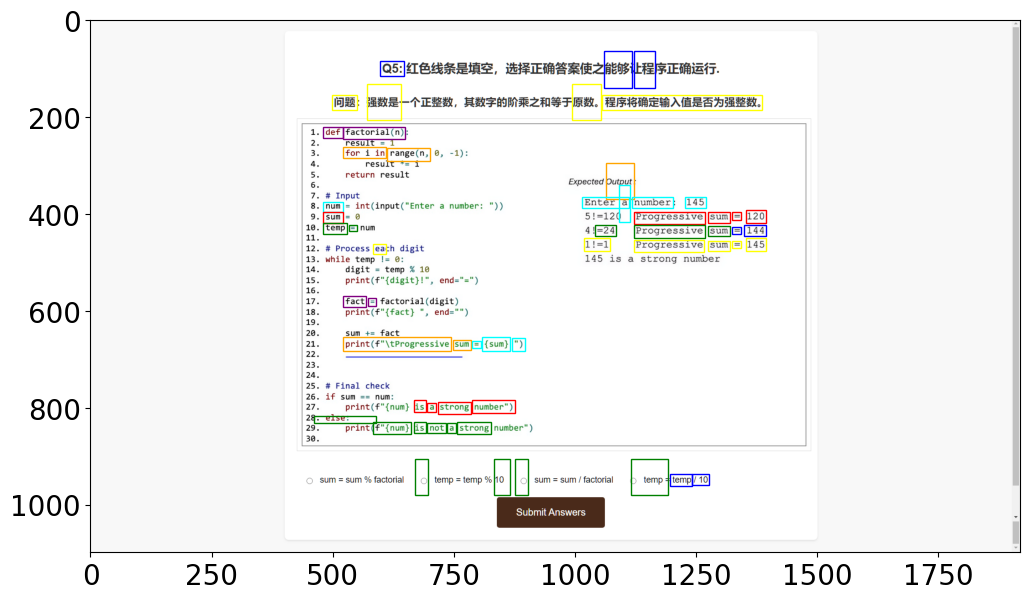

        kind             name         trial_id     x    y  width  height  \
0   sub-line    line 2 part 1  introduction-Q5   602   90     41      20   
1   sub-line    line 2 part 2  introduction-Q5  1065   69     48      65   
2   sub-line    line 2 part 3  introduction-Q5  1127   69     34      65   
3   sub-line    line 3 part 1  introduction-Q5   504  160     41      20   
4   sub-line    line 3 part 2  introduction-Q5   576  137     60      65   
5   sub-line    line 3 part 3  introduction-Q5  1000  137     48      65   
6   sub-line    line 3 part 4  introduction-Q5  1062  160    320      20   
7   sub-line    line 4 part 1  introduction-Q5   486  225     30      13   
8   sub-line    line 4 part 2  introduction-Q5   527  225    118      16   
9   sub-line    line 5 part 1  introduction-Q5   527  267     79      13   
10  sub-line    line 5 part 2  introduction-Q5   618  269     79      16   
11  sub-line    line 5 part 3  introduction-Q5  1069  300     48      65   
12  sub-line

In [11]:
# Example Usage
# Run OCR detection with debugging enabled
aoi_result_df =aoi.aoi_detector(image_path, 
                                scale_factor=.43, debug=True, 
                                use_preprocessing=False, min_confidence=5,
                                psm=1, oem=3)
# Display detected text results
print(aoi_result_df)

# Save aoi tokens structure

In [12]:
# file path
file_path = "output/ymu_um/aoi_tokens_structure/"

In [13]:
aoi.aoi_save_tokens_structure(aoi_result_df, file_path)

Saving AOI tokens structure: 100%|██████████| 58/58 [00:00<00:00, 38352.46it/s]

Completed! AOI tokens saved to ./output/ymu_um/aoi_tokens_structure//aoi_introduction-Q5_tokens_structrue.csv


# Maching aoi to trial_data

### for individual partcipant

In [14]:
experiment_id = 'Participant55'
trial_id = 'introduction-Q5'
aoi_file_path = f"output/ymu_um/aoi_tokens_structure/aoi_{trial_id}_tokens_structure.csv"
aoi_file_path

'output/ymu_um/aoi_tokens_structure/aoi_introduction-Q5_tokens_structure.csv'

In [15]:
trial_data = eye_events[(eye_events['experiment_id'] == experiment_id) &
                        (eye_events['trial_id'] == trial_id)]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
1833955,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,570343608,233.0,856.0,201.0,NaN,NaN,None,3.180,2.962,NaN,NaN,fixation
1833956,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,570353548,233.0,856.0,201.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1833957,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,570360263,233.0,856.0,201.0,NaN,NaN,None,3.256,2.979,NaN,NaN,fixation
1833958,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,570376918,233.0,856.0,201.0,NaN,NaN,None,3.244,2.996,NaN,NaN,fixation
1833959,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,570393572,233.0,856.0,201.0,NaN,NaN,None,3.253,3.002,NaN,NaN,fixation


In [16]:
aoi_fixations = aoi.aoi_tokens_matcher(aoi_file_path, trial_data, trial_id, redius=25)

aoi_fixations.head()


Matching fixations to AOIs: 100%|██████████| 6360/6360 [00:10<00:00, 591.39fixation/s]


,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,...,pupil_right,aoi_kind,aoi_name,aoi_token,aoi_x,aoi_y,aoi_width,aoi_height,image,eye_event_type
0,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,574903202,167.0,1139.0,...,NaN,sub-line,line 3 part 4,"REINER,",1062,160,320,20,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
1,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,574907008,167.0,1139.0,...,2.932,sub-line,line 3 part 4,"REINER,",1062,160,320,20,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
2,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,574919201,167.0,1139.0,...,NaN,sub-line,line 3 part 4,"REINER,",1062,160,320,20,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
3,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,574923662,167.0,1139.0,...,2.937,sub-line,line 3 part 4,"REINER,",1062,160,320,20,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
4,Tobii I-VT (Fixation),Participant55,Participant55,YMU-UM Recording55.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,574935602,167.0,1139.0,...,NaN,sub-line,line 3 part 4,"REINER,",1062,160,320,20,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation


### save aoi_df

In [159]:
file_path = "output/ymu_um/"
# save the aoi fixations to a CSV file
aoi_fixations.to_csv(f"{file_path}individual/aoi/aoi_fixations_{trial_id}.csv", index=False)

### for task

In [126]:
# trial_id = 'Q5' # for UNL_UM
trial_id = 'introduction-Q5' # for YMU-UM
aoi_file_path = f"output/ymu_um/aoi_tokens_structure/aoi_{trial_id}_tokens_structure.csv"
aoi_file_path

'output/ymu_um/aoi_tokens_structure/aoi_introduction-Q5_tokens_structure.csv'

In [127]:
trial_data = eye_events[eye_events['trial_id'] == trial_id]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
30007,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534273776,700.0,933.0,274.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
30008,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534280287,700.0,933.0,274.0,NaN,NaN,None,3.037,2.933,NaN,NaN,fixation
30009,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534293118,700.0,933.0,274.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
30010,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534296941,700.0,933.0,274.0,NaN,NaN,None,3.047,2.949,NaN,NaN,fixation
30011,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534313596,700.0,933.0,274.0,NaN,NaN,None,3.051,2.955,NaN,NaN,fixation


In [128]:
trial_data = eye_events[eye_events['trial_id'] == trial_id]

trial_data.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
30007,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534273776,700.0,933.0,274.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
30008,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534280287,700.0,933.0,274.0,NaN,NaN,None,3.037,2.933,NaN,NaN,fixation
30009,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534293118,700.0,933.0,274.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
30010,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534296941,700.0,933.0,274.0,NaN,NaN,None,3.047,2.949,NaN,NaN,fixation
30011,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,534313596,700.0,933.0,274.0,NaN,NaN,None,3.051,2.955,NaN,NaN,fixation


In [129]:
aoi_fixations = aoi.aoi_tokens_matcher(aoi_file_path, trial_data, trial_id, redius=25)

aoi_fixations.head()


Matching fixations to AOIs: 100%|██████████| 468475/468475 [1:19:19<00:00, 98.42fixation/s]


,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,...,pupil_right,aoi_kind,aoi_name,aoi_token,aoi_x,aoi_y,aoi_width,aoi_height,image,eye_event_type
0,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,535013035,250.0,588.0,...,NaN,sub-line,line 3 part 2,RR,576,137,60,65,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
1,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,535013096,250.0,588.0,...,2.869,sub-line,line 3 part 2,RR,576,137,60,65,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
2,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,535028959,250.0,588.0,...,NaN,sub-line,line 3 part 2,RR,576,137,60,65,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
3,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,535029751,250.0,588.0,...,2.866,sub-line,line 3 part 2,RR,576,137,60,65,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation
4,Tobii I-VT (Fixation),Participant10,Participant10,YMU-UM Recording10.tsv,introduction-Q5,datasets/YMU_UM/stimuli,introduction-Q5.png,535044960,250.0,588.0,...,NaN,sub-line,line 3 part 2,RR,576,137,60,65,datasets/YMU_UM/stimuli/Quiz - introduction-Q5...,fixation


In [130]:
file_path = "output/ymu_um/"

In [131]:
# save aoi_fixations
aoi_fixations.to_csv(f"{file_path}/group/aoi/aoi_fixations_{trial_id}_nonopt.csv", index=False)